<a href="https://colab.research.google.com/github/VOL-EM2024/mo/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/OnlineRetail.csv", encoding='ISO-8859-1')
df # чтение файла


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [14]:
from numpy import nan

def convert_to_float(df, column_name):
    df[column_name] = df[column_name].astype(str).str.replace('[^0-9.]', '', regex=True).replace('', nan).astype(float)
    return df[column_name]

df['Quantity'] = convert_to_float(df, 'Quantity')
df['UnitPrice'] = convert_to_float(df, 'UnitPrice')
df['InvoiceNo'] = convert_to_float(df, 'InvoiceNo')

Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  float64
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  float64
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(4), object(4)
memory usage: 33.1+ MB


колонка "CustomerID" выделяется, поэтому мы удаляем его

In [16]:
df = df.drop(columns = ['CustomerID', 'InvoiceNo', 'StockCode', 'InvoiceDate'])
df


,Description,Quantity,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,United Kingdom
1,WHITE METAL LANTERN,6.0,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8.0,2.75,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,3.39,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6.0,3.39,United Kingdom
...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12.0,0.85,France
541905,CHILDREN'S APRON DOLLY GIRL,6.0,2.10,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4.0,4.15,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4.0,4.15,France


<Axes: >

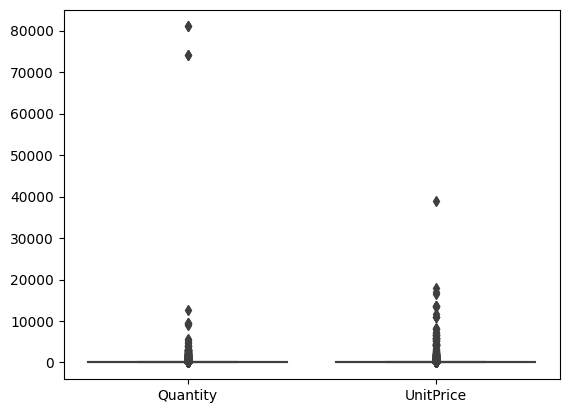

In [17]:
sns.boxplot(df)

 Выбросы есть, поэтому их нужно удалить

In [18]:
!pip install detectorusoutlierus==0.0.1b0


In [19]:
from detectorusoutlierus import outliers as do


In [20]:
#Методом среднего
outlier_detector = do.Outline(df)
columns = ['Quantity', 'UnitPrice']
for col in columns:
    outliers_kvart = outlier_detector.detect_outlier_mean_std(col)
    df = pd.concat([df, outliers_kvart, outliers_kvart]).drop_duplicates(keep=False)
df

,Description,Quantity,UnitPrice,Country
19,RECIPE BOX WITH METAL HEART,4.0,7.95,United Kingdom
29,PANDA AND BUNNIES STICKER SHEET,12.0,0.85,France
30,STARS GIFT TAPE,24.0,0.65,France
31,INFLATABLE POLITICAL GLOBE,48.0,0.85,France
33,SET/2 RED RETROSPOT TEA TOWELS,18.0,2.95,France
...,...,...,...,...
541814,ROLL WRAP VINTAGE SPOT,25.0,1.25,United Kingdom
541833,JUMBO BAG VINTAGE CHRISTMAS,30.0,1.79,United Kingdom
541865,LUNCH BAG RED RETROSPOT,40.0,1.45,United Kingdom
541867,RED FLOCK LOVE HEART PHOTO FRAME,72.0,0.72,United Kingdom


<Axes: >

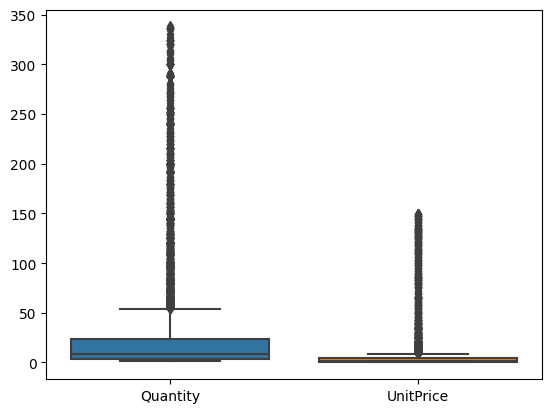

In [21]:
sns.boxplot(df)

убрали выбросы)

In [22]:
df_cluster = df.copy()

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>]], dtype=object)

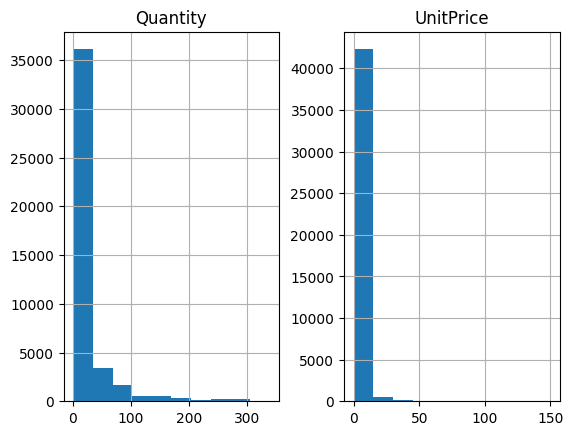

In [23]:
df_cluster.hist()

In [26]:
df_cluster = df[['UnitPrice', 'Quantity']]
df_cluster

,UnitPrice,Quantity
19,7.95,4.0
29,0.85,12.0
30,0.65,24.0
31,0.85,48.0
33,2.95,18.0
...,...,...
541814,1.25,25.0
541833,1.79,30.0
541865,1.45,40.0
541867,0.72,72.0


In [27]:
from sklearn.preprocessing import StandardScaler

features = ['UnitPrice', 'Quantity']
df_cluster[features] =  StandardScaler().fit_transform(df_cluster[features])

<ipython-input-27-360a89ed0451>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[features] =  StandardScaler().fit_transform(df_cluster[features])


In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

In [29]:
X = df_cluster.to_numpy()

array([[ 0.47254912, -0.45550748],
       [-0.33021109, -0.26669086],
       [-0.35282405,  0.01653406],
       ...,
       [-0.2623722 ,  0.39416729],
       [-0.34490952,  1.14943374],
       [-0.21714627,  0.5829839 ]])

In [52]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=3)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-53-47d38194aa89>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df["UnitPrice"], df["Quantity"], s=50, cmap='viridis')


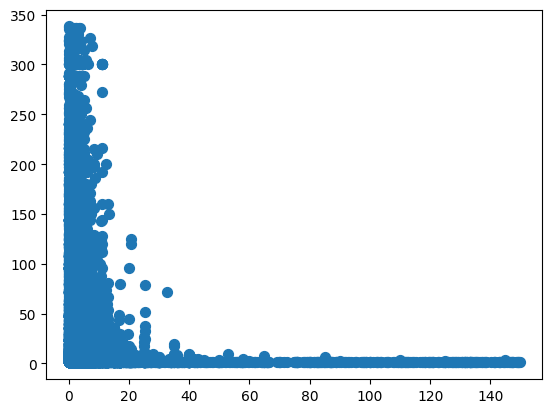

In [53]:
plt.scatter(df["UnitPrice"], df["Quantity"], s=50, cmap='viridis')

plt.show()

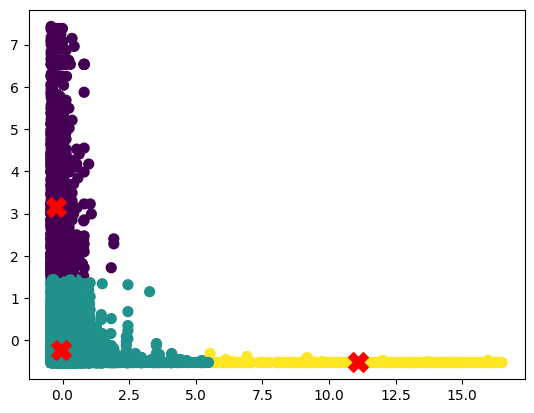

In [54]:
plt.scatter(df_cluster["UnitPrice"], df_cluster["Quantity"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')

plt.show()

In [40]:
from sklearn.metrics import silhouette_score
# Визуализируем результаты кластеризации
AUTO_N_INIT = 'auto'
range_n_clusters = range(2,10)

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=AUTO_N_INIT)
    cluster_labels = kmeans.fit_predict(X)

    # Вычисление силуэтной оценки
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

# Определение оптимального числа кластеров для данных Wine
optimal_n_clusters = max(silhouette_scores, key=lambda x: x[1])[0]
print('Оптимальное число кластеров:', optimal_n_clusters)
silhouette_scores

Оптимальное число кластеров: 3


[(2, 0.7692249593297351),
 (3, 0.7904041208117232),
 (4, 0.6652878467842606),
 (5, 0.5727390112405508),
 (6, 0.6156347121954521),
 (7, 0.5840423437655676),
 (8, 0.5433608299896927),
 (9, 0.5357453709054847)]

In [46]:
list(range(2,10))

[2, 3, 4, 5, 6, 7, 8, 9]

In [50]:
silhouette_scores

[(2, 0.7692249593297351),
 (3, 0.7904041208117232),
 (4, 0.6652878467842606),
 (5, 0.5727390112405508),
 (6, 0.6156347121954521),
 (7, 0.5840423437655676),
 (8, 0.5433608299896927),
 (9, 0.5357453709054847)]

<ipython-input-51-42a743389b23>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(list(range(2,10)), [item[1] for item in silhouette_scores], cmap='viridis')


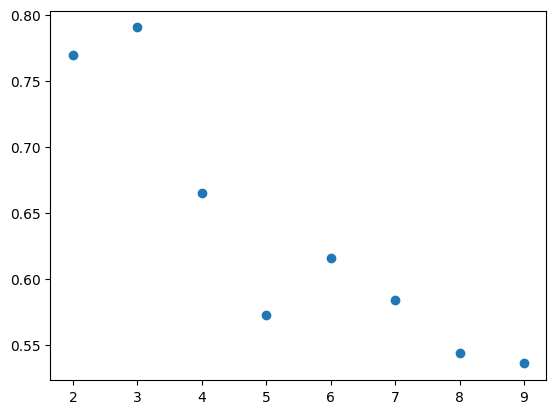

In [51]:
plt.scatter(list(range(2,10)), [item[1] for item in silhouette_scores], cmap='viridis')

In [ ]:
print(cluster_centers) # центры кластеров в двумерном пространстве

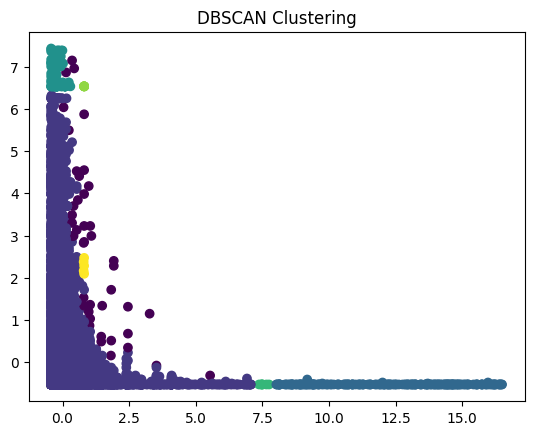

In [60]:
from sklearn.cluster import DBSCAN


# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [68]:
df_cluster['dbscan_labels'] = labels

<ipython-input-68-8f0301993488>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['dbscan_labels'] = labels


In [71]:
df_cluster.groupby('dbscan_labels', observed=True).agg(['count','mean', 'std', 'min', 'max']).T

dbscan_labels           -1             0           1           2         3  \
UnitPrice count  43.000000  42881.000000  207.000000  108.000000  7.000000   
          mean    1.220302     -0.061192   12.241696   -0.223543  7.531024   
          std     1.055047      0.487772    2.559684    0.176903  0.127971   
          min     0.040642     -0.426316    8.025279   -0.426316  7.375156   
          max     5.540114      7.078927   16.496095    0.295037  7.751662   
Quantity  count  43.000000  42881.000000  207.000000  108.000000  7.000000   
          mean    2.754924     -0.018401   -0.524261    6.779840 -0.526314   
          std     2.009298      0.934307    0.011444    0.308415  0.000000   
          min    -0.313895     -0.526314   -0.526314    6.530707 -0.526314   
          max     7.144361      6.318289   -0.408303    7.427586 -0.526314   

dbscan_labels           4         5  
UnitPrice count  6.000000  5.000000  
          mean   0.811744  0.804507  
          std    0.000000  0.009909  
          min    0.811744  0.793653  
          max    0.811744  0.811744  
Quantity  count  6.000000  5.000000  
          mean   6.530707  2.277613  
          std    0.000000  0.153323  
          min    6.530707  2.093517  
          max    6.530707  2.471150

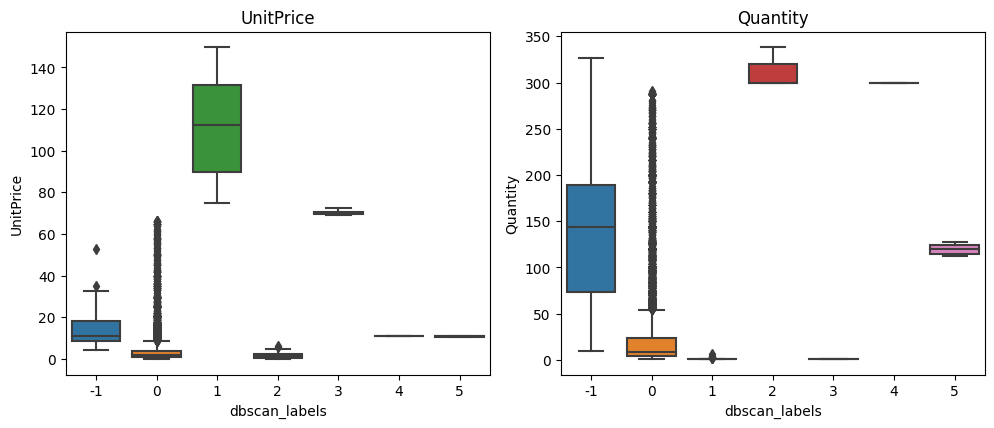

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 20))

# Создание boxplot для каждой колонки с разделением по меткам кластеров
for i, column in enumerate(df_cluster.columns[:-1], 1):  # Исключаем последний столбец 'labels'
    plt.subplot(5, 3, i)  # Установка 5 строк и 3 столбцов для графиков
    sns.boxplot(data=df_cluster, x='dbscan_labels', y=df[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

In [81]:
df_cluster

,UnitPrice,Quantity,dbscan_labels
19,0.472549,-0.455507,0
29,-0.330211,-0.266691,0
30,-0.352824,0.016534,0
31,-0.330211,0.582984,0
33,-0.092775,-0.125078,0
...,...,...,...
541814,-0.284985,0.040136,0
541833,-0.223930,0.158147,0
541865,-0.262372,0.394167,0
541867,-0.344910,1.149434,0


In [82]:
df

,Description,Quantity,UnitPrice,Country
19,RECIPE BOX WITH METAL HEART,4.0,7.95,United Kingdom
29,PANDA AND BUNNIES STICKER SHEET,12.0,0.85,France
30,STARS GIFT TAPE,24.0,0.65,France
31,INFLATABLE POLITICAL GLOBE,48.0,0.85,France
33,SET/2 RED RETROSPOT TEA TOWELS,18.0,2.95,France
...,...,...,...,...
541814,ROLL WRAP VINTAGE SPOT,25.0,1.25,United Kingdom
541833,JUMBO BAG VINTAGE CHRISTMAS,30.0,1.79,United Kingdom
541865,LUNCH BAG RED RETROSPOT,40.0,1.45,United Kingdom
541867,RED FLOCK LOVE HEART PHOTO FRAME,72.0,0.72,United Kingdom


In [61]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5}

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here